#### Importing libraries

In [3]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# Loading the dataframe
df = pd.read_csv("data/winemag-data-130k-v2.csv")

In [9]:
df.shape

(129971, 14)

In [12]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [18]:
df.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [21]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()),
                                                                           ", ".join(df.variety.unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),
                                                                                      ", ".join(df.country.unique()[0:5])))

There are 129971 observations and 14 features in this dataset. 

There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir... 

There are 44 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France... 



In [22]:
df[["country", "description","points"]].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


In [23]:
# Groupby by country
country = df.groupby("country")

# Summary statistic of all countries
country.describe().head()

Unnamed: 0                                       \
                            count          mean           std      min   
country                                                                  
Argentina                  3800.0  65075.723158  38080.749866     16.0   
Armenia                       2.0  37158.000000  40995.222746   8170.0   
Australia                  2329.0  65037.539287  37271.655310     77.0   
Austria                    3345.0  65614.296861  37455.323032     93.0   
Bosnia and Herzegovina        2.0  56613.000000  56775.017675  16467.0   

                                                               points  \
                             25%      50%       75%       max   count   
country                                                                 
Argentina               30912.25  65171.5  99149.25  129948.0  3800.0   
Armenia                 22664.00  37158.0  51652.00   66146.0     2.0   
Australia               34120.00  64984.0  96027.00  129726.0  2329.0   
Austria                 32623.00  67701.0  98385.00  129939.0  3345.0   
Bosnia and Herzegovina  36540.00  56613.0  76686.00   96759.0     2.0   

                                   ...                 price             \
                             mean  ...    75%    max   count       mean   
country                            ...                                    
Argentina               86.710263  ...  89.00   97.0  3756.0  24.510117   
Armenia                 87.500000  ...  87.75   88.0     2.0  14.500000   
Australia               88.580507  ...  91.00  100.0  2294.0  35.437663   
Austria                 90.101345  ...  92.00   98.0  2799.0  30.762772   
Bosnia and Herzegovina  86.500000  ...  87.25   88.0     2.0  12.500000   

                                                                     
                              std   min    25%   50%    75%     max  
country                                                              
Argentina               23.430122   4.0  12.00  17.0  25.00   230.0  
Armenia                  0.707107  14.0  14.25  14.5  14.75    15.0  
Australia               49.049458   5.0  15.00  21.0  38.00   850.0  
Austria                 27.224797   7.0  18.00  25.0  36.50  1100.0  
Bosnia and Herzegovina   0.707107  12.0  12.25  12.5  12.75    13.0  

[5 rows x 24 columns]

In [25]:
country.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81814,81814,Switzerland,This wine has a bouquet of tart cherry with a ...,NaN,89,160.0,Switzerland,NaN,NaN,Jeff Jenssen,@worldwineguys,Gantenbein 2012 Pinot Noir (Switzerland),Pinot Noir,Gantenbein
83622,83622,India,"Pineapple, grapefruit, and apricot show bright...",NaN,90,10.0,Nashik,NaN,NaN,Mike DeSimone,@worldwineguys,Sula 2013 Chenin Blanc (Nashik),Chenin Blanc,Sula
96759,96759,Bosnia and Herzegovina,A mix of red and black fruits pervade on the n...,NaN,88,12.0,Mostar,NaN,NaN,Jeff Jenssen,@worldwineguys,Winery Čitluk 2011 Blatina (Mostar),Blatina,Winery Čitluk
109989,109989,China,This deep ruby-colored wine features a bouquet...,Noble Dragon,89,18.0,China,NaN,NaN,Mike DeSimone,@worldwineguys,Chateau Changyu-Castel 2009 Noble Dragon Red (...,Cabernet Blend,Chateau Changyu-Castel


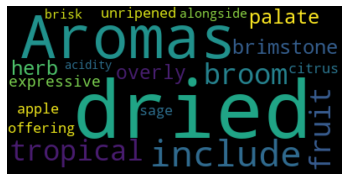

In [28]:
# Start with one review:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 403027 words in the combination of all review.


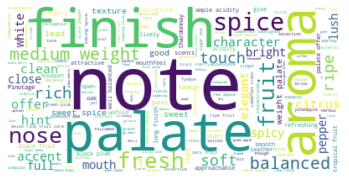

In [33]:
# Join reviews of South Africa:
sa_txt = " ".join(review for review in df[df["country"]=="South Africa"].description)
print ("There are {} words in the combination of all review.".format(len(sa_txt)))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(sa_txt)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()